In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/yelp-dataset/

Mounted at /gdrive
/gdrive/.shortcut-targets-by-id/1_gjMlo4-Yc2a07FoZ-EWOm1Tb1uwEJ7T/yelp-dataset


In [ ]:
import pandas as pd

business=pd.read_json('/gdrive/MyDrive/yelp-dataset/yelp_academic_dataset_business.json',lines=True)

In [ ]:
business.is_open.value_counts()

1    123248
0     37337
Name: is_open, dtype: int64

In [ ]:
df_business = business[business['is_open']==1].drop(['hours','is_open'], axis=1)
print(df_business.shape)
df_business.head()

(123248, 12)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons"
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit..."


In [ ]:
df_explode = df_business.assign(categories = df_business.categories.str.split(', ')).explode('categories')
df_explode.sample(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
146910,rNmAxOkEJ07_YHAxHKyH4Q,Hawkers Asian Street Food - Atlanta,"661 Auburn Ave NE, Ste 180",Atlanta,GA,30312,33.756326,-84.365460,4.0,332,"{'RestaurantsGoodForGroups': 'True', 'Music': ...",Malaysian
63794,jGEe4TOgd7fba1lNYnnMdw,Bedrock Stone & Design,3700 RR 620 N,Austin,TX,78734,30.396493,-97.926800,4.0,8,"{'BusinessParking': '{'garage': False, 'street...",Shopping
134700,7fBlHaUI0iXG09rWjixV-w,Take Junk,510 Main St,Wilmington,MA,01887,42.543888,-71.170357,5.0,10,{'BusinessAcceptsCreditCards': 'True'},Local Services


In [ ]:
print('Total number of categories:', len(df_explode.categories.value_counts()))
print('Top 10 categories:')
df_explode.categories.value_counts()[:10]

Total number of categories: 1316
Top 10 categories:


Restaurants                  32022
Food                         20418
Shopping                     20309
Home Services                14795
Health & Medical             13630
Beauty & Spas                13569
Local Services               10677
Automotive                    8886
Event Planning & Services     7856
Nightlife                     7829
Name: categories, dtype: int64

In [ ]:
df_explode[df_explode['categories'].str.contains('Restaurants', case=True, na=False)].categories.value_counts()

Restaurants           32022
Pop-Up Restaurants       48
Name: categories, dtype: int64

In [ ]:
business_R = df_business[df_business['categories'].str.contains(
                         'Restaurants', case=False, na=False)]
print(business_R.shape)
business_R.head()

(32022, 12)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai"
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,None,"Breakfast & Brunch, Restaurants"
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants"


In [ ]:
review_json_path='/gdrive/MyDrive/yelp-dataset/yelp_academic_dataset_review.json'

In [ ]:
size = 1000000
review = pd.read_json(review_json_path, lines=True,
                      # identifying the data type of each column can reduce memory usage
                      dtype={'review_id':str,'user_id':str,'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,'funny':int,'cool':int},
                      chunksize=size)

In [ ]:
# There are multiple chunks to be read
chunk_list = []
for chunk in review:
    # Drop columns that aren't needed
    chunk = chunk.drop(['review_id','useful','funny','cool'], axis=1)
    # Renaming column name to avoid conflict with business overall star rating
    chunk = chunk.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(business_R, chunk, on='business_id')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
    
# After trimming down the review file, concatenate all relevant data back to one dataframe
df = pd.concat(chunk_list, ignore_index=True, axis=0)
print(df.shape)
df.sample(3)


511083 out of 1,000,000 related reviews
491654 out of 1,000,000 related reviews
499336 out of 1,000,000 related reviews
497131 out of 1,000,000 related reviews
491491 out of 1,000,000 related reviews
497867 out of 1,000,000 related reviews
504386 out of 1,000,000 related reviews
492867 out of 1,000,000 related reviews
319251 out of 1,000,000 related reviews
(4305066, 16)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,user_id,review_stars,text,date
67494,4KZm9EcnygkFmEWpPSNqIw,Hyatt Regency Columbus,350 N High St,Columbus,OH,43215,39.969621,-83.001321,3.0,182,"{'RestaurantsReservations': 'True', 'Restauran...","Beauty & Spas, Hotels, Hotels & Travel, Day Sp...",UxuxtBXqkZZxuqKVqDD9LQ,4,Great hotel - friendly staff. Very convenient...,2014-07-02 00:32:09
3768276,KPg8DbRc8-FAWBsO72aSgg,G. Michael's Bistro & Bar,595 S 3rd St,Columbus,OH,43215,39.950237,-82.995848,4.5,246,"{'Caters': 'False', 'WiFi': 'u'no'', 'GoodForK...","Bars, Cocktail Bars, Italian, Desserts, Gluten...",iKrf4PDuIctC2uq4DtZc_A,3,Ordered take out for birthday and ordered the ...,2020-05-03 20:37:10
1148196,6okBFSsondq1TBdXfWdmiA,Nonna Emilia Ristorante Italiano,17210 SW Shaw St,Aloha,OR,97007,45.491938,-122.853936,3.5,452,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pizza, Caterers, Restaurants, Bars, Lounges, N...",WfBVwM2A8uowBEgTMbk9iA,2,Not a fan. The fiance hated the bolognese whi...,2013-06-22 12:28:40


In [ ]:
select_df = df.loc[df['name']==("Oskar Blues Taproom")]

In [ ]:
select_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,user_id,review_stars,text,date,polarity
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",93z0yh-sUpGZS-cSKu6xxA,5,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21,Positive
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",Q_CZIvnsDHjpls-EPzzG7Q,2,Went there about 1 PM on a Monday. It wasn't ...,2018-08-14 05:22:00,Negative
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",rqxTSFFj5fZNmabY1fmTlw,5,This was the place the be on Friday Night! If ...,2018-03-17 14:22:48,Positive
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",vNPxlt5f50q0e2nVAScW3Q,4,Went to this place with my family over the wee...,2018-04-04 21:16:50,Positive
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",eXRC79iX60xwA1UuGRuWNg,4,"Stopped on a midweek afternoon, and so glad th...",2018-04-28 19:17:04,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",b9AWdZKry6pAHcMyErr2dw,5,"Yes it's just a taproom, not the brewery but W...",2018-11-21 19:39:49,Positive
82,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",w1ZxfCfjujPDmAT1XzhLHg,5,On National Cheese Burger Day we traveled to O...,2019-09-19 01:47:50,Positive
83,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",yAdzLzExYQx91aWPUGccgA,5,"At the recommendation of a local, I came here ...",2021-01-08 21:35:24,Positive
84,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",wlYUNxUwEpVDFI33ZvnGmg,5,YES! YES! YES!\n\nSPECS: \n\nTHE PLACE:\nCozy ...,2020-12-01 23:36:45,Positive


In [ ]:
other_df= df.loc[df['categories'].str.contains('Gastropubs | Food | Beer Gardens| Bars| American (Traditional) | Beer Bar| Nightlife| Breweries')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [ ]:
stars_df= business_R.loc[business_R['categories'].str.contains('Gastropubs | Food | Beer Gardens| Bars| American (Traditional) | Beer Bar| Nightlife| Breweries')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [ ]:
stars_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B..."
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,3.0,7,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe..."
29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru..."
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta..."
62,z8-_6l5EhX5NuPfWzJYQMA,Great Wraps,3393 Peachtree Rd NE,Atlanta,GA,30326,33.846335,-84.363578,3.0,11,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","Food, Restaurants, Cheesesteaks, Sandwiches, J..."
...,...,...,...,...,...,...,...,...,...,...,...,...
160521,68nXXzFyK8tzcBlv8eM3tw,McMenamins Barley Mill Pub,1629 S.E. Hawthorne Blvd.,Portland,OR,97214,45.512422,-122.648782,3.5,108,"{'HasTV': 'True', 'NoiseLevel': 'u'average'', ...","Pubs, Breweries, Food, American (Traditional),..."
160552,s6Hk0G2AWc2wi0tIzfdCSA,Mission Hill K-8 School,20 Child St,Jamaica Plain,MA,02130,42.307142,-71.114307,4.0,5,None,"Community Service/Non-Profit, Elementary Schoo..."
160556,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,4.5,737,"{'RestaurantsPriceRange2': '4', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants"
160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,4.0,137,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura..."


In [ ]:
import numpy as np
stars_df['stars'] = np.where(stars_df['stars'] > 3.5, 1, 0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
stars_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,1,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B..."
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,0,7,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe..."
29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,0,856,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru..."
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,1,395,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta..."
62,z8-_6l5EhX5NuPfWzJYQMA,Great Wraps,3393 Peachtree Rd NE,Atlanta,GA,30326,33.846335,-84.363578,0,11,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","Food, Restaurants, Cheesesteaks, Sandwiches, J..."
...,...,...,...,...,...,...,...,...,...,...,...,...
160521,68nXXzFyK8tzcBlv8eM3tw,McMenamins Barley Mill Pub,1629 S.E. Hawthorne Blvd.,Portland,OR,97214,45.512422,-122.648782,0,108,"{'HasTV': 'True', 'NoiseLevel': 'u'average'', ...","Pubs, Breweries, Food, American (Traditional),..."
160552,s6Hk0G2AWc2wi0tIzfdCSA,Mission Hill K-8 School,20 Child St,Jamaica Plain,MA,02130,42.307142,-71.114307,1,5,None,"Community Service/Non-Profit, Elementary Schoo..."
160556,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,1,737,"{'RestaurantsPriceRange2': '4', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants"
160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,1,137,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura..."


In [ ]:
other_df['review_stars']

0          5
1          2
2          5
3          4
4          4
          ..
4304897    3
4304898    5
4304899    5
4304900    5
4304901    2
Name: review_stars, Length: 1724465, dtype: int64

In [ ]:
business_df = stars_df.join(pd.DataFrame(stars_df['attributes'].to_dict()).T)
# further split sub-attributes into their own columns
cols_to_split = ['BikeParking', 'DogsAllowed', 'HappyHour', 'OutdoorSeating','RestaurantsGoodForGroups', 'RestaurantsTableService','RestaurantsTakeOut','Caters','WheelchairAccessible','HasTV' ]
for col_to_split in cols_to_split:
    new_df = pd.DataFrame(business_df[col_to_split].to_dict(),index=[0]).T
    new_df.columns = [col_to_split + '_' + str(col) for col in new_df.columns]
    business_df = business_df.join(new_df)

business_df.drop(['attributes'] + cols_to_split, axis=1, inplace=True)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BikeParking_0,DogsAllowed_0,HappyHour_0,OutdoorSeating_0,RestaurantsGoodForGroups_0,RestaurantsTableService_0,RestaurantsTakeOut_0,Caters_0,WheelchairAccessible_0,HasTV_0
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,1,86,...,True,False,True,True,True,True,True,True,True,True
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,0,7,...,True,NaN,NaN,NaN,True,NaN,None,False,NaN,False
29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,0,856,...,False,False,False,False,False,True,True,False,True,True
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,1,395,...,False,False,True,None,True,True,True,True,True,True
62,z8-_6l5EhX5NuPfWzJYQMA,Great Wraps,3393 Peachtree Rd NE,Atlanta,GA,30326,33.846335,-84.363578,0,11,...,NaN,NaN,NaN,NaN,False,NaN,True,NaN,NaN,NaN


In [ ]:
# columns with non-boolean categorical values:
cols_to_split = ['Alcohol','NoiseLevel', 'RestaurantsAttire', 'Smoking', 'WiFi']
new_cat = pd.concat([pd.get_dummies(business_df[col], prefix=col, prefix_sep='_') for col in cols_to_split], axis=1)
# keep all columns (not n-1) because 0's for all of them indicates that the data was missing (useful info)
business_df = pd.concat([business_df, new_cat], axis=1)
business_df.drop(cols_to_split, inplace=True, axis=1)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Smoking_u'no',Smoking_u'outdoor',Smoking_u'yes',WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_None,WiFi_u'free',WiFi_u'no',WiFi_u'paid'
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,1,86,...,0,0,0,0,0,0,0,1,0,0
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,0,7,...,0,0,0,0,0,0,0,1,0,0
29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,0,856,...,0,0,0,0,0,0,0,1,0,0
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,1,395,...,1,0,0,0,0,0,0,1,0,0
62,z8-_6l5EhX5NuPfWzJYQMA,Great Wraps,3393 Peachtree Rd NE,Atlanta,GA,30326,33.846335,-84.363578,0,11,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9371 entries, 0 to 160574
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   business_id                  9371 non-null   object 
 1   name                         9371 non-null   object 
 2   address                      9371 non-null   object 
 3   city                         9371 non-null   object 
 4   state                        9371 non-null   object 
 5   postal_code                  9371 non-null   object 
 6   latitude                     9371 non-null   float64
 7   longitude                    9371 non-null   float64
 8   stars                        9371 non-null   int64  
 9   review_count                 9371 non-null   int64  
 10  categories                   9371 non-null   object 
 11  BusinessParking              8671 non-null   object 
 12  BusinessAcceptsCreditCards   7839 non-null   object 
 13  RestaurantsReser

In [ ]:
import numpy as np
attribute_cols = business_df.columns[34:44]
business_df[attribute_cols] = business_df[attribute_cols].apply(pd.to_numeric, errors='coerce')

cols=business_df.columns[34:79]

model_df = business_df[cols]  # use just attributes not basic data or check-in columns

feature_cols = model_df.columns
X = model_df
y = business_df.stars


In [ ]:
business_df[attribute_cols] = business_df[attribute_cols].replace(np.nan, 0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
a=business_df[attribute_cols]

In [ ]:
a.isin([np.inf, -np.inf]).sum()

BikeParking_0                 0
DogsAllowed_0                 0
HappyHour_0                   0
OutdoorSeating_0              0
RestaurantsGoodForGroups_0    0
RestaurantsTableService_0     0
RestaurantsTakeOut_0          0
Caters_0                      0
WheelchairAccessible_0        0
HasTV_0                       0
dtype: int64

In [ ]:
cols=business_df.columns[34:79]

model_df = business_df[cols]  # use just attributes not basic data or check-in columns

X = model_df
y = business_df.stars

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)
print (X_train.shape)
print (X_test.shape)

(8433, 45)
(938, 45)


In [ ]:
business_df = business_df.reset_index()

In [ ]:
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
print ('Train RMSE:')
print (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print ('Test RMSE:')
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print ('')
print (lr.intercept_)
res = pd.DataFrame({'feature': feature_cols, 'coef': lr.coef_})
print (res.sort_values(by=['coef'], ascending=False))

Train RMSE:
0.47057602904821466
Test RMSE:
0.48381442843786

0.629207542889709
                        feature          coef
5     RestaurantsTableService_0  1.777125e+11
3              OutdoorSeating_0  1.481549e+11
2                   HappyHour_0  7.914540e+10
8        WheelchairAccessible_0  4.138669e+10
6          RestaurantsTakeOut_0  2.053264e+10
27   RestaurantsAttire_'formal'  2.367080e-01
28       RestaurantsAttire_None  2.079857e-01
12               Alcohol_'none'  1.774739e-01
16              Alcohol_u'none'  1.627818e-01
35                Smoking_u'no'  1.518097e-01
14     Alcohol_u'beer_and_wine'  1.203343e-01
36           Smoking_u'outdoor'  1.117020e-01
33                Smoking_'yes'  9.646615e-02
10      Alcohol_'beer_and_wine'  8.343472e-02
43                   WiFi_u'no'  7.928467e-02
42                 WiFi_u'free'  7.745361e-02
26   RestaurantsAttire_'dressy'  7.176414e-02
19           NoiseLevel_'quiet'  5.607115e-02
39                    WiFi_'no'  4.506683e-02
3

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
import pandas as pd

train = pd.read_csv('/gdrive/MyDrive/yelp-dataset/yelp_review_polarity_csv/train.csv', names= ('class','text'))
test = pd.read_csv('/gdrive/MyDrive/yelp-dataset/yelp_review_polarity_csv/test.csv', names= ('class','text'))

In [ ]:
train

,class,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


In [ ]:
train.loc[train["class"] == 1, "class"] = 0
train.loc[train["class"] == 2, "class"] = 1
test.loc[test["class"] == 1, "class"] = 0
test.loc[test["class"] == 2, "class"] = 1

In [ ]:
X_train = train['text']
y_train = train['class']
X_test = test['text']
y_test = test['class']

In [ ]:
max_vocab = 80000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=300)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=300)

In [ ]:
svc_texts = list(train['text'])
svc_labels = list(train['class'])

In [ ]:

import numpy as np
t1 = datetime.now()
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3)
svc_classifier = LinearSVC(max_iter=5000)
Xs = vectorizer.fit_transform(svc_texts)
 
print(datetime.now() - t1)
print(Xs.shape)
 
score = cross_val_score(svc_classifier, Xs,svc_labels, cv=2, n_jobs=-1)

print(datetime.now() - t1)
print(score)
print(sum(score) / len(score))
svc_classifier.fit(Xs, np.array(svc_labels))

0:02:58.630717
(560000, 1563653)
0:03:17.459026
[0.94867857 0.95306786]
0.9508732142857144


LinearSVC(max_iter=5000)

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, np.array(svc_labels), test_size=0.4)

In [ ]:
svc_classifier.fit(Xs_train, ys_train)
svc_pred = svc_classifier.predict(Xs_test)

In [ ]:
print("Report for Support Vector Machine:")
print(classification_report(ys_test, svc_pred))

Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    111722
           1       0.95      0.96      0.95    112278

    accuracy                           0.95    224000
   macro avg       0.95      0.95      0.95    224000
weighted avg       0.95      0.95      0.95    224000



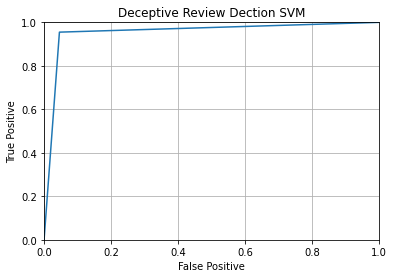

In [ ]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(ys_test,svc_pred)

plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title("Deceptive Review Dection SVM")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.grid(True)
plt.show()

[Text(0, 0.5, 'no'), Text(0, 1.5, 'yes')]

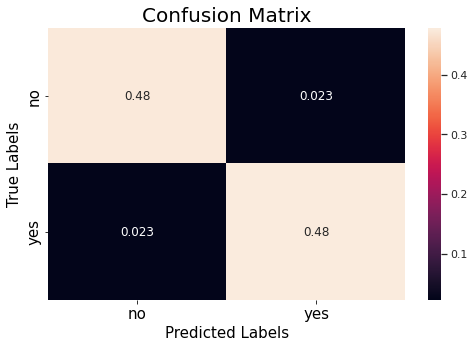

In [ ]:
import seaborn as sns
matrix = confusion_matrix(svc_pred, ys_test, normalize='all')
plt.figure(figsize=(8, 5))
ax= plt.subplot()
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(["no","yes"], size=15)
ax.yaxis.set_ticklabels(["no","yes"], size=15)

In [ ]:
sample_text_list = list(select_df["text"])

In [ ]:
X = vectorizer.transform(sample_text_list)

In [ ]:
svc_classifier.fit(Xs, svc_labels)
svc_predictions = svc_classifier.predict(X)

In [ ]:
negative = select_df['text'][select_df['polarity'] == "Negative"].head(10000)

In [ ]:
y_output = list(svc_predictions)
yp=["Positive" if a==1 else "Negative" for a in y_output]

In [ ]:
select_df['polarity']=yp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.svm import LinearSVC

from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def text_process(data):
   
    for i in range(len(data)):
        line = data[i]
        line = line.lower()
        translation = str.maketrans("","", string.punctuation);
        line = line.translate(translation)
        split = word_tokenize(line)
        # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        filtered = []
        for token in split:
            if re.search('[a-zA-Z]', token):    
                filtered.append(token)
        
        # filter out stop words
        word = [i for i in filtered if i not in stopwords.words('english')]
        word = [i for i in filtered if i not in STOPWORDS]
        
        d = [stemmer.stem(word) for word in word] 
        d = [wordnet_lemmatizer.lemmatize(word) for word in d]
        data[i] = d
    return data

In [ ]:
def top_words(text_df):
    train = list(text_df)
    text = text_process(train)
    text = sum(text,[])
    
    counts = Counter(text)
    wordcloud = WordCloud(    
                          background_color='white',
                          max_words=100,
                          max_font_size=50,
                          min_font_size=10,
                          random_state=40,
                        
                         ).fit_words(counts)
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

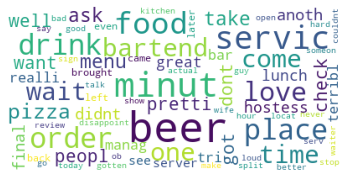

In [ ]:
top_words(negative)

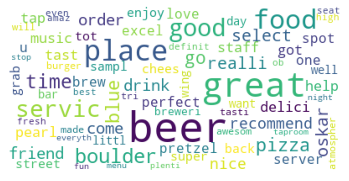

In [ ]:
positive = select_df['text'][select_df['polarity'] == "Positive"].head(10000)
top_words(positive)

In [ ]:
select_df['date'] = pd.to_datetime(select_df['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


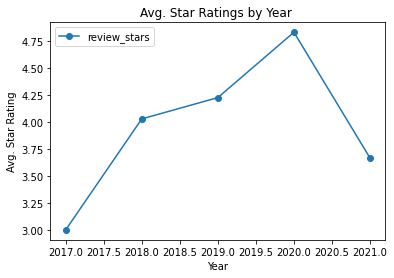

In [ ]:
import matplotlib.pyplot as plt

select_df.groupby(select_df.date.dt.year).review_stars.mean().plot(marker = 'o')
plt.xlabel('Year')
plt.ylabel('Avg. Star Rating')
plt.title('Avg. Star Ratings by Year ')
plt.legend()
plt.show()